
# Diseño de software para cómputo científico

----

## Unidad 2: Testing


### Agenda de la Unidad 2
---

**Clase 1**
    
    - Calidad de software.
    - Principios de diseño: DRY y KISS 
    - Refactoreo.

**Clase 2**
    
    - Depuración de código.
    - Pruebas unitarias y funcionales con pytest.
    - Testing basados en propiedades (Hypothesis).

**Clase 3**

    - Cobertura de código (codecov).
    - Perfilado de código


## Pytest

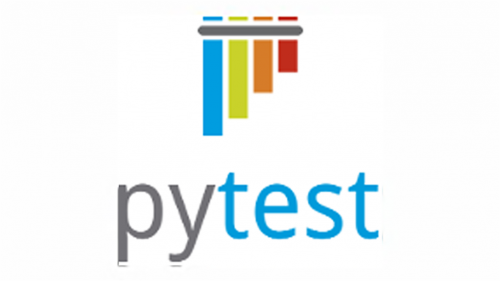

In [2]:
!pip install pytest

You should consider upgrading via the 'pip install --upgrade pip' command.


## Pytest Básico

In [3]:
# content of test_sample.py
def inc(x):
    return x + 1


def test_answer():
    assert inc(3) == 5

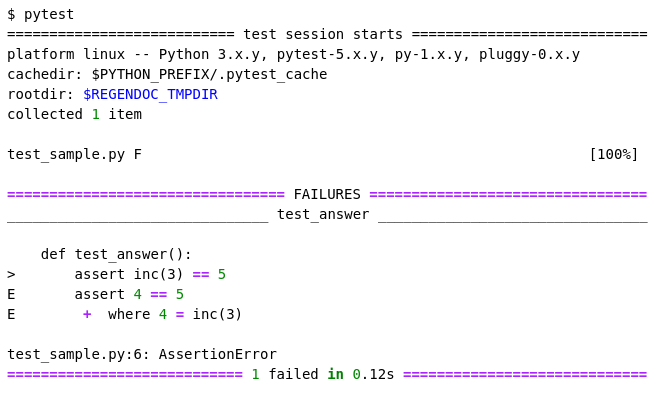

## Esperando errores

In [14]:
# content of test_sysexit.py
import pytest

def f():
    raise SystemExit(1)

def test_mytest():
    with pytest.raises(SystemExit):
        f()

## Test Case

In [ ]:
class TestClass:
    
    def test_one(self):
        x = "this"  
        assert 'h' in x

    def test_two(self):
         x = "hello"
        assert hasattr(x, 'check')
        

## Como correr tests

- py.test tests/test_mod.py
- py.test tests/
- py.test -k match **# def test_match():**
- py.test -x **# stop on first failure case**
- py.test --maxfail=2 **# on the second**
- py.test -s **# enable `print` output**
- py.test --durations=10 **# list top10 slowest cases**



## Qué es lo que se testea?

- folder, file.	
- recursive	
- test_xxx.py, xxx_test.py	
- TestClass (without __init__ method)	
- all the function or method with prefix `test_`


## Fixtures

In [15]:
import numpy as np

import pytest


@pytest.fixture
def normal():
    return np.random.normal(10, 2, 100)


class TestCaseNormal:

    def test_mean(self, normal):
        assert normal.mean() == 10

    def test_std(self, normal):
        assert normal.std() == 10

## Fixtures

In [16]:
import numpy as np

import pytest


@pytest.fixture
def normal():
    return np.random.normal(10, 2, 100)


class TestCaseNormal:

    def test_mean(self, normal):
        np.testing.assert_almost_equal(normal.mean(), 10., 0)

    def test_std(self, normal):
        np.testing.assert_almost_equal(normal.std(), 2., 0)

## Fixtures

In [ ]:
import numpy as np

import pytest

class TestCaseNormal:

    @pytest.fixture
    def normal(self):
        return np.random.normal(10, 2, 100)

    def test_mean(self, normal):
        np.testing.assert_almost_equal(normal.mean(), 10., 0)

    def test_std(self, normal):
        np.testing.assert_almost_equal(normal.std(), 2., 0)

## Fixtures a la `xUnit`

In [17]:
class TestCaseUniform:

    def setup_method(self, method):
        self.uniform = np.random.uniform(10, 20, 100)

    def teardown_method(self, method):
        print("Finishing")

    def test_min(self):
        assert self.uniform.min() >= 10

    def test_max(self):
        assert self.uniform.min() <= 20



## Fixtures a la `xUnit`

- `setup_module` / `teardown_module`	
- `setup_class` / `teardown_class`
- `setup_method` / `teardown_method`	
- `setup_function` / `teardown_function`


## Markers

- Skip and xfail: Para tests que no pueden funcionar
- SkipIf: Para los que no funcionan en ciertas condiciones

In [18]:
@pytest.mark.skip(reason="no way of currently testing this")
def test_the_unknown():
    ...

In [19]:
import sys


@pytest.mark.skipif(sys.version_info < (3, 6), reason="requires python3.6 or higher")
def test_function():
    ...

In [20]:
@pytest.mark.skipif(sys.platform == "win32", reason="does not run on windows")
class TestPosixCalls:
    def test_function(self):
        "will not be setup or run under 'win32' platform"

In [21]:
@pytest.mark.xfail
def test_function():
    ...

## Property base testing

Paper seminal:

> Claessen, K., & Hughes, J. (2011). QuickCheck: a lightweight tool for random testing of Haskell programs. Acm sigplan notices, 46(4), 53-64.


<small>Fuente: <a href="https://www.freecodecamp.org/news/intro-to-property-based-testing-in-python-6321e0c2f8b/">https://www.freecodecamp.org/news/intro-to-property-based-testing-in-python-6321e0c2f8b/</a></small>

## Part 1: Example-based testing

- Given a test input `I`
- When passed to function under test
- should return an output `O`

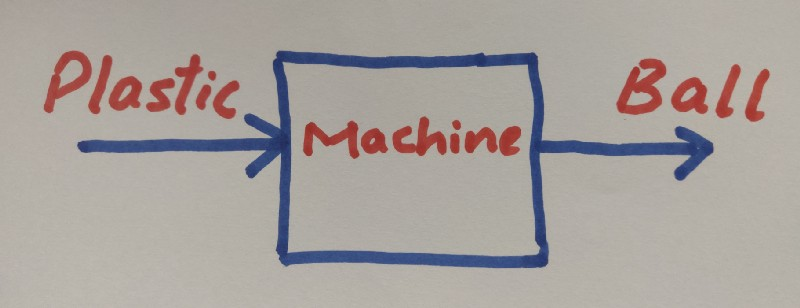

Probemos esta máquina con testing basado en ejemplos

- take a blue-coloured raw plastic (fixed test data)
- feed the plastic to machine
- expect a blue-coloured plastic ball as output (fixed test output)

## Lo mismo pero con un programa

In [1]:
def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


def test_sum():
    assert sum(1, 2) == 3


## Este test es suficiente para **validar** la funcionalidad de `sum()`?

- La respuesta simple es no.
- Podemos usar parametrización de pytest para mejorar esto

In [ ]:
def sum(num1, num2):
    """It returns sum of two numbers"""
    return num1 + num2


import pytest


@pytest.mark.parametrize(
    'num1, num2, expected',
    [(3, 5, 8), (-2, -2, -4), (-1, 5, 4), (3, -5, -2), (0, 5, 5)]
)
def test_sum(num1, num2, expected):
    assert sum(num1, num2) == expected

Pero es esencialmente más de lo mismo. Lo cual nos lleva a al primer problema de los testings basados en ejemplos

## Issue 1: La exhaustividad depende de la persona que escribe los tests

- La persona puede queres escribir 5, 50 o 500 tests.
- Pero nunca puede estar seguro si logro probar todo. (sobre todos los edge cases)

Lo cual nos lleva al segundo problema

##  Issue 2: Los tests no son robustos por el entendimiento ambiguo de los requerimientos


Nos dieron todos los detalles de la función sum?


- Que tipo de input espera la función?
- Como debe comportarse la funcion frente a inputs inesperados?
- Que tipo de output debe retornar nuestra función?



##  Issue 2: Los tests no son robustos por el entendimiento ambiguo de los requerimientos


O si lo ponemos en contexto de nuestro código:

- `num1` y `num2` tienen que ser `int` o `float`? pueden ser `str`?
- Hay cotas minimas y maximas para `num1` y `num2`?
- Como manejo `None`?
- El retorno tiene que ser `int` o `float`?
- Cuales ecenarios justifican mensajes de errores?
- Hay algun ecenario donde pueda engañar al test?

In [3]:
def sum(num1, num2):
    """Buggy logic"""
    results = {
        (3, 5): 8, (-2, -2): -4, 
        (-1, 5): 4, (3, -5): -2, (0, 5): 5}
    return results.get((num1, num2))

## Part 2: Property-based testing

- Los frameworks de Property based testing frameworks verifican la veracidad de propiedades
- Una propiedad es un statement del tipo:

```python
    for all (x, y, …)
    such as precondition(x, y, …) holds
    property(x, y, …) is true.
```

Asi el *aproach* en propiedades para la maquina de hacer pelotas seria:

- Dada una gran coleccion de plasticos.
- Aseguraque todos este coloreados.
- Y la salida tiene que tener las siguientes propiedades:
    - Es esferica.
    - Es coloreada con el mismo color del input.

## Hypotesis testing

In [4]:
!pip install hypothesis

     |████████████████████████████████| 276kB 460kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
from hypothesis import given
from hypothesis import strategies as st


@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, num2) == num1 + num2

## Hypotesis testing - Verbose

In [ ]:
from hypothesis import given, settings, Verbosity, example
from hypothesis import strategies as st

@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
@example(1, 2)
def test_sum(num1, num2):
    assert sum(num1, num2) == num1 + num2

## Las estrategias son desgraciadas

In [16]:
st.lists(st.characters()).example()

['\U0004ab22', '\U00053f6c', '-', '#', '!', '麗']

In [19]:
st.dictionaries(st.characters(), st.floats()).example()

{'\U000d0b40': 2.00001,
 '\U0003df65': -1.9,
 '\U000dc3ac': 6.829471474986977e+16,
 '\x1f': 2.00001}

Sobre las estrategias: https://hypothesis.readthedocs.io/en/latest/data.html

## Hay estrategias para el stack científico

In [21]:
from hypothesis.extra import numpy as npst

npst.arrays(float, (3, 4), elements=None, fill=None, unique=False).example()

array([[      -inf,       -inf, 0.33333333,        nan],
       [      -inf,       -inf,       -inf,       -inf],
       [      -inf,       -inf,       -inf,       -inf]])

In [24]:
from hypothesis.extra import pandas as pdst

pdst.data_frames([
    pdst.column('A', dtype=int), 
    pdst.column('B', dtype=float)]).example()

,A,B
0,-2675253163605311715,inf
1,-176,inf
2,-1931906840198638661,inf


## Pensando en propiedades reales

- Al parecer la suma es conmutativa.
- Sumar cero a un valor devuelve el mismo valor

In [26]:
from hypothesis import given, settings, Verbosity
from hypothesis import strategies as st

@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, 0) == num1
    assert sum(0, num2) == num2
    assert sum(num1, num2) == sum(num2, num1)
    assert sum(num1, num2) - num1 == num2

## Shrinking

- Hasta ahora todo es razonable de programar.
- Pero la inferencia es solo parte del truco.

In [27]:
@settings(verbosity=Verbosity.verbose)
@given(st.integers(), st.integers())
def test_sum(num1, num2):
    assert sum(num1, 0) == num1
    assert sum(num1, num2) == sum(num2, num1)
    assert num1 <= 30

Hypotesis trata de encontrar el ejemplo minimo entendible para un ser humano

### Estrategias custom

In [30]:
import attr

@attr.s()
class Persona:
    name: str = attr.ib()
    edad: int = attr.ib()
        

In [47]:
PersonaStrategy = st.builds(
  Persona,
  st.text(min_size=5, max_size=10),
  st.integers(min_value=0, max_value=80))

In [50]:
PersonaStrategy.example()

Persona(name='(\U000b3f2d\U000c4c41\x01\U0010ac7c\U000d65ac', edad=9)

### Estrategias custom (con composición)

In [51]:
@attr.s()
class Persona:
    name: str = attr.ib()
    edad: int = attr.ib()
    mayor_de_edad: bool = attr.ib()

In [87]:
@st.composite
def persona_stategy(draw):
    name = draw(st.text(min_size=5, max_size=80))
    age = draw(st.integers(min_value=0, max_value=17))
    mayor_de_edad = draw(st.booleans())
    return Persona(name, age, mayor_de_edad)


In [86]:
persona_stategy().example()

Persona(name='\U000ac061⢾\U00089baf#0', edad=5, mayor_de_edad=False)